In [1]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

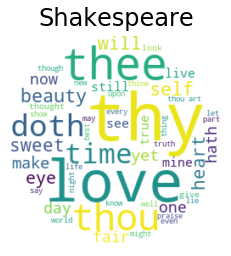

In [2]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

In [7]:
import re

def format_poem(sonnet):
    # Formatting a single poem.
    lines = [line.split() for line in sonnet.split('\n') if line.split()]
    ans = ["*****"]
    for line in lines[1:len(lines)]:
        for word in line:
            word_1 = re.sub(r'[^\w]', '', word).lower()
            ans.append(word_1)
        ans.append("#####")
    #print("Here is the formatted poem:")
    #print(ans)
    return ans

def parse_observations2(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n\n') if line.split()]
    
    # Single out a single poem.
    formatted = []
    sonnets = text.split('\n\n')
    for poem in sonnets:
        formatted.append(format_poem(poem))

    obs_counter = 0
    obs = []
    obs_map = {}
    
    for poem in formatted:
        obs_elem = []
        for word in poem:
            if word not in obs_map:
                obs_map[word] = obs_counter
                obs_counter += 1
            obs_elem.append(obs_map[word])
        
        # Add the encoded sequence.
        obs.append(obs_elem)
                    
    return obs, obs_map

def create_syllables_map():
    text = open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt')).read()
    syllables_map = {}
    lines = [line.split() for line in text.split('\n') if line.split()]
    for line in lines:
        word = re.sub(r'[^\w]', '', line[0]).lower()
        #print(line)
        if line[1][0] == 'E':
            no_syllables = int(line[-1])
        else:
            no_syllables = int(line[1])
        syllables_map[word] = no_syllables
    return syllables_map

obs, obs_map = parse_observations2(text)
syllables_map = create_syllables_map()

In [8]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 10, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


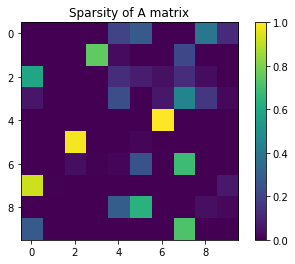

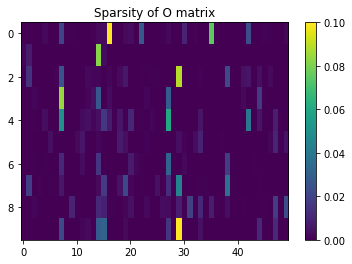

In [9]:
visualize_sparsities(hmm8, O_max_cols=50)

In [23]:
from HMM_helper import *
from HMM import *

def sample_line(hmm, obs_map, syllables_map, n_words=100):
    # Get reverse map.
    count_syllables = 0
    line = []
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    emission, states = hmm.generate_emission(n_words)
    for i in emission:
        line.append(obs_map_r[i])
        count_syllables += syllables_map[obs_map_r[i]]
        if count_syllables >= 10:
            line.append("\n")
            break
    #sentence = [obs_map_r[i] for i in emission]

    return ' '.join(line).capitalize()

def sample_poem(hmm, obs_map, syllables_map):
    # Generate a crappy 14-line sonnet
    poem = []
    for i in range(0, 14):
        poem.append(sample_line(hmm, obs_map, syllables_map))
    return ''.join(poem)

In [24]:
print('Sample Poem:\n====================')
print(sample_poem(hmm8, obs_map, syllables_map))

Sample Poem:
Lose thy that flower thou be cool interim in 
Forwards praises alteration i saw 
Thee strong am be pomp this survive that bud 
Wherefore and prize of princes wide can summers 
Heavens not recite others nor truth then for 
Moods measure is a sail at i captain 
To foot to steal and indigest that thine 
Doth the but quite sometime when i know the 
Waste of blamed selfdoing thou is love life 
They bed particulars and on poor very 
Another master heavens shore of him full 
On no hue and say the alive now in 
As again like to with be it affairs 
By i thou and make thy sorrows it gavst 

